In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
import keras
from keras.preprocessing.image import ImageDataGenerator
from keras.optimizers import Adam
from keras.callbacks import ModelCheckpoint


In [ ]:

!unzip /content/drive/MyDrive/Dataset/drive-download-20240413T054121Z-001.zip

Archive:  /content/drive/MyDrive/Dataset/drive-download-20240413T054121Z-001.zip
  inflating: test/diseased cotton leaf/dis_leaf (124).jpg  
  inflating: test/diseased cotton leaf/dis_leaf (248).jpg  
  inflating: test/diseased cotton plant/dd (706).jpg  
  inflating: test/diseased cotton plant/dd (513).jpg  
  inflating: test/diseased cotton leaf/dis_leaf (322).jpg  
  inflating: test/fresh cotton plant/dsd (600).jpg  
  inflating: test/fresh cotton plant/dsd (632).jpg  
  inflating: test/diseased cotton plant/dd (328).jpg  
  inflating: test/fresh cotton plant/dsd (405).jpg  
  inflating: test/diseased cotton plant/dd (41).jpg  
  inflating: test/fresh cotton leaf/d (341).jpg  
  inflating: test/fresh cotton plant/dsd (223).jpg  
  inflating: test/fresh cotton leaf/d (396).jpg  
  inflating: test/test data comp files/d (396)_compressed.jpg  
  inflating: test/test data comp files/d (378)_compressed.jpg  
  inflating: test/test data comp files/dis_leaf (322)_compressed.jpg  
  inflati

In [ ]:
train_data_path="/content/train"
validation_data_path="/content/val"

In [ ]:
#--- Shoe Augmrnted Image

def plotimages(images_arr):
    fig,axes=plt.subplots(1,5,figsize=(20,20))
    axes= axes.flatten()
    for img ,ax in zip(images_arr,axes):
        ax.imshow(img)
    plt.tight_layout()
    plt.show()



In [ ]:
# Augmentation Image Generator it will be use for traing
#---- it generates more images using below parameters..


train_datagen=ImageDataGenerator(rescale=1./255,
                                 rotation_range=40,width_shift_range=0.2,
                                 height_shift_range=0.2,
                                 shear_range=0.2,
                                 zoom_range=0.2,
                                 horizontal_flip=True,
                                 fill_mode='nearest')

In [ ]:
# This is a Generator that will read pictures found in
# at train_data_path ,and Generates batches of augmented image data..

train_data=train_datagen.flow_from_directory(train_data_path,
                                             target_size=(150,150),
                                             batch_size=32,
                                             class_mode="binary")

Found 1951 images belonging to 4 classes.


In [ ]:
train_data.class_indices

{'diseased cotton leaf': 0,
 'diseased cotton plant': 1,
 'fresh cotton leaf': 2,
 'fresh cotton plant': 3}

In [ ]:
#--- This is Augmentation conf. we will use for validation

val_datagen=ImageDataGenerator(rescale=1./255)



#---This is Generator for Validation data

Val_data=val_datagen.flow_from_directory(validation_data_path,
                                         target_size=(150,150),
                                         batch_size=32,
                                         class_mode='binary')

Found 324 images belonging to 4 classes.


In [ ]:
Val_data.class_indices

{'diseased cotton leaf': 0,
 'diseased cotton plant': 1,
 'fresh cotton leaf': 2,
 'fresh cotton plant': 3}

In [ ]:
images=[train_data[0][0][0] for i in range(6)]

plotimages(images)

NameError: name 'train_data' is not defined

In [ ]:
# Using Checkpoint Save best Model using Val Accuracy

model_path="/content/saved model"
checkpoint=ModelCheckpoint(model_path,monitor="val_accuracy",
           verbose=1,save_best_model=True,mode=max )

callbacks_list=[checkpoint]

In [ ]:
# Building CNN model

In [ ]:
import tensorflow as tf
from tensorflow import keras
from keras import Sequential
from keras.layers import Conv2D,Dense,MaxPooling2D,Flatten,Dropout

In [ ]:
model=Sequential()

model.add(Conv2D(filters=32,kernel_size=3,input_shape=[150,150,3])),
model.add(MaxPooling2D(pool_size=(2,2))),
model.add(Conv2D(filters=64,kernel_size=3)),
model.add(MaxPooling2D(pool_size=(2,2))),
model.add(Conv2D(filters=128,kernel_size=3)),
model.add(MaxPooling2D(pool_size=(2,2))),
model.add(Conv2D(filters=256,kernel_size=3)),
model.add(MaxPooling2D(pool_size=(2,2))),


#---- appling dropout Layer before Flatter Layer
model.add(Dropout(0.5))

#---- appling Flattern Layer
model.add(Flatten()),


model.add(Dense(units=128,activation='relu')),   #----INPUT LAYE
model.add(Dropout(0.1)),
model.add(Dense(units=256,activation='relu')),
model.add(Dropout(0.25)),
model.add(Dense(units=4,activation='softmax'))   #----OUTPUT LAYER

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 148, 148, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2  (None, 74, 74, 32)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 72, 72, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 36, 36, 64)        0         
 g2D)                                                            
                                                                 
 conv2d_2 (Conv2D)           (None, 34, 34, 128)       73856     
                                                                 
 max_pooling2d_2 (MaxPoolin  (None, 17, 17, 128)       0

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

In [ ]:
#----- TOTAL NO OF TRAINABLE PARAMTERS ARE: 2028228

In [ ]:
#---- COMPILE CNN MODEL

model.compile(optimizer=Adam(lr=0.0001),loss='sparse_categorical_crossentropy',metrics=['accuracy'])

In [ ]:
# Train CNN Model
hist=model.fit(train_data,epochs=110,validation_data=Val_data,
          callbacks=callbacks_list)

Epoch 1/110
61/61 [==============================] - ETA: 0s - loss: 1.2184 - accuracy: 0.4782
Epoch 1: saving model to /content/saved model
61/61 [==============================] - 32s 347ms/step - loss: 1.2184 - accuracy: 0.4782 - val_loss: 1.2099 - val_accuracy: 0.4907
Epoch 2/110
61/61 [==============================] - ETA: 0s - loss: 0.9852 - accuracy: 0.5976
Epoch 2: saving model to /content/saved model
61/61 [==============================] - 28s 460ms/step - loss: 0.9852 - accuracy: 0.5976 - val_loss: 0.9229 - val_accuracy: 0.6358
Epoch 3/110
61/61 [==============================] - ETA: 0s - loss: 0.9239 - accuracy: 0.6335
Epoch 3: saving model to /content/saved model
61/61 [==============================] - 19s 308ms/step - loss: 0.9239 - accuracy: 0.6335 - val_loss: 1.3127 - val_accuracy: 0.4475
Epoch 4/110
61/61 [==============================] - ETA: 0s - loss: 0.8837 - accuracy: 0.6392
Epoch 4: saving model to /content/saved model
61/61 [==============================] -

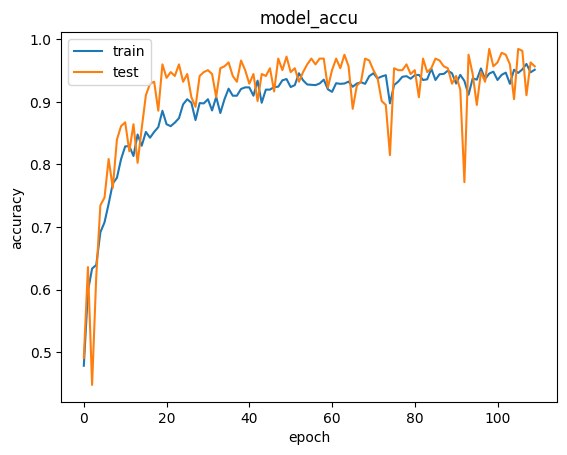

In [ ]:
#graph of accuracy vs val_accuracy

plt.plot(hist.history['accuracy'])
plt.plot(hist.history['val_accuracy'])
plt.title('model_accu')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(["train","test"],loc='upper left')

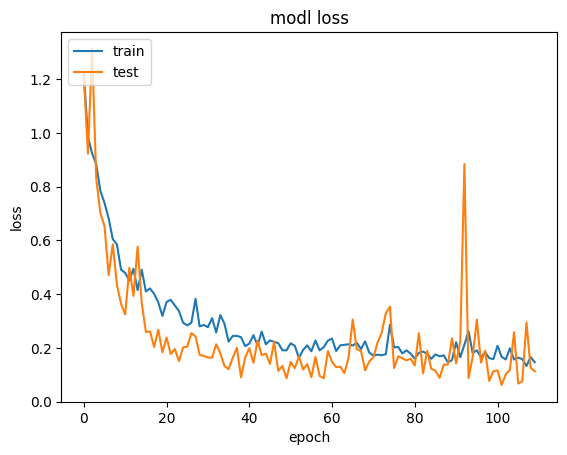

In [ ]:
#plot of loss vs val_loss

plt.plot(hist.history['loss'])
plt.plot(hist.history['val_loss'])
plt.title('modl loss')
plt.ylabel("loss")
plt.xlabel('epoch')
plt.legend(['train','test'],loc='upper left')
plt.show()

In [ ]:
from tensorflow.keras.models import load_model
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.metrics import precision_score, recall_score, f1_score, roc_auc_score

In [ ]:
y_pred = model.predict(Val_data)

# Convert predictions to class labels
y_pred_classes = np.argmax(y_pred, axis=1)
y_true = Val_data.classes

# Calculate precision
precision = precision_score(y_true, y_pred_classes, average='weighted')

# Calculate recall
recall = recall_score(y_true, y_pred_classes, average='weighted')

# Calculate F1 score
f1 = f1_score(y_true, y_pred_classes, average='weighted')

# Calculate ROC AUC score
roc_auc = roc_auc_score(y_true, y_pred, multi_class='ovr')

print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)
print("ROC AUC Score:", roc_auc)


11/11 [==============================] - 3s 219ms/step
Precision: 0.24591186087382813
Recall: 0.24691358024691357
F1 Score: 0.24621770703585935
ROC AUC Score: 0.4745979337865923


In [ ]:
#--- CLASSIFICATION REPORT CONTAINING RECALL,PRECISION AND F1 SCORE VALUE

In [ ]:
print(classification_report(y_true,y_pred_classes))

              precision    recall  f1-score   support

           0       0.17      0.16      0.17        55
           1       0.28      0.30      0.29       101
           2       0.22      0.21      0.21        80
           3       0.29      0.27      0.28        88

    accuracy                           0.25       324
   macro avg       0.24      0.24      0.24       324
weighted avg       0.25      0.25      0.25       324

